<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/imgbot/error_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>신경망 학습</h1>
학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것이다. 신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개한다.<br> 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.<br>
기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 기계가 담당한다.<br> 다만 이미지를 벡터로 변활할 때 사용하는 특징은 여전히 '사람'이 설계하는 것을 주의해야한다.<br> 문제에 적합한 특징을 쓰지 않으면 좋은 결과를 얻을 수 없다.<br>
기계학습은 특징은 사람이 설계하지만, <br> 신경망(딥러닝)은 이미지에 포함된 중요한 특징까지 기계가 스스로 학습한다. 처음부터 끝까지 사람의 개입 없이 얻을 수 있다.

<h2>훈련 데이터와 시험데이터</h2>
왜 훈련 데이터와 시험 데이터를 나누는 이유가 있다. 우리가 원하는 것은 범용적으로 사용할수 있는 모델이기 때문이다.<br> 이 범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리하는 것이다.<br> 범용 능력은 아직 보지 않은 데이터로도 문제를 올바르게 풀어내는 능력이다. 이 능력을 얻어내는 것이 기계학습의 최종 목표다.<br> 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라고 한다. 이 오버피팅을 피하는 것도 기계학습의 중요한 과제다.

<h1>손실함수</h1>
누군가 우리에게 "행복한가요?" 라고 묻는다면 우리는 "12.00291 정도 행복하네요" 라고 말 하는게 불가능하다.<br> 하지만 신경망은 '손실 함수'로 판단이 가능하다. 그리고 이 하나의 지표를 기준으로 최적의 매개변수 값을 탐색한다.<br> 이 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

<h1>오차제곱합</h1>
가장 많이 쓰이는 손실 함수는 오차제곱합이다. <br>

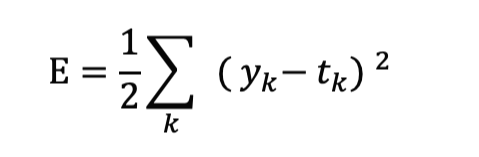
<br>
Sum of squares for error, SSE이다. yk는 신경망의 출력(신경망이 추정한 값), tk는 정답 레이블, k는 데이터의 차원 수를 나타낸다. 


In [ ]:
def sum_squares_error(y,t):

  return 0.5 * np.sum((y-t)**2)

t=[0,0,1,0,0,0,0,0,0](원핫인코딩)
<br>
예시 1: '2일 확률이 가장 높다고 추정함(0.6)<br>
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squares_error(np.array(y),np.array(t))
0.097500000031
<br>
예시 2: '7'일 확률이 가장 높다.(0.6)<br>
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))
0.59750000003
<br>
두가지 예를 봤다. 첫번째 예시는 정답과 신경망의 출력이 똑같은 경우다. 한편 두번째는 2가 아닌 7이 가장 높다고 나왔다.<br> 이 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작다.<br> 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 정답에 더 가깝다. 

<br>
<h1>교차 엔트로피 오차</h1>
또 다른 손실 함수이다. CEE라고 일컫는다.

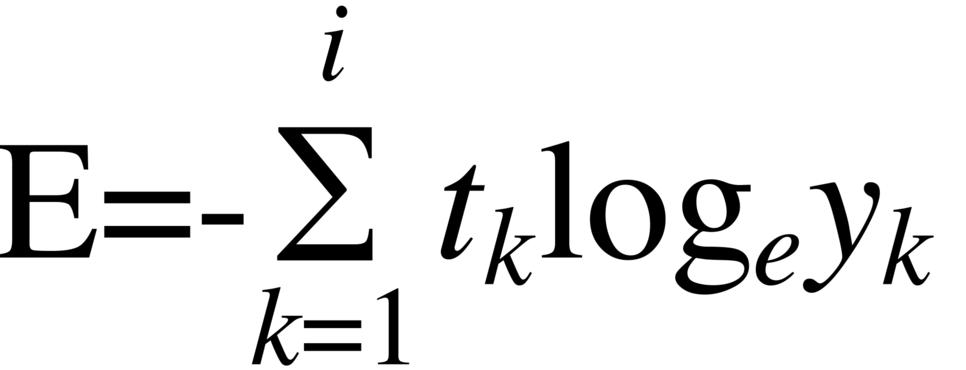
<br>
log밑이 e인 자연로그이다. yk는 신경망의 출력, tk는 정답 레이블이다. 또 tk는 원-핫 인코딩이다. 그래서 실질적으로 정답일때의 추정의 자연로그를 계산하는 식이다. 출력이 커질수록 0에 다가가다가, 그 출력이 1일 대 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

In [ ]:
def cross_entropy_error(y,t):
  delta=1e-7
  return -np.sum(t*np.log(t*np.log(y+delta)))

t=[0,0,1,0,0,0,0,0,0] <br>
예시 1: '2일 확률이 가장 높다고 추정함(0.6)<br>
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] <br>
cross_entropy_error(np.array(y),np.array(t))<br> 0.510825<br>
예시 2: '7'일 확률이 가장 높다.(0.6)<br>
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
<br>cross_entropy_error(np.array(y), np.array(t))<br> 2.302584
<br>
첫 번쨰 예는 정답일 때의 출력이 0.6인 경우로 이때의 엔트로피 오차는 약 0.51이다.
그다음의 정답일 때의 출력이 더 낮은 0.1인 경우로 이때의 교차 엔트로피 오차는 무려 2.3이다. 즉 결과가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로 오차 제곱합과 똑 같다.

<h1>미니배치학습</h1>
지금까지 데이터 하나에 대한 손실 함수만 생각했다, 이제 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해야한다.

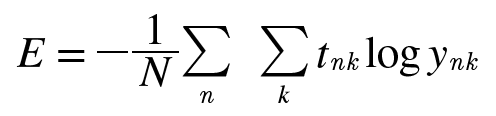

<br>
교차 엔트로피 함수는 이렇게 바뀌어야 한다. 단순히 N개의 데이터로 확장했을 뿐이다. 다만, 마지막으로 N으로 나누어 정규화를 하고 있다.하지만 MNIST 데이터셋은 6만장의 훈련 데이터가 있다. 그래서 미니배치로 훈련 데이터로부터 일부만 골라 학습하는 거다.

In [ ]:
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

np.random.choice()로 지정한 범위의 무작위로 원하는 개수만 꺼낸다. 이렇게 미니배치로 계산하면 된다.
<h1>(배치용) 교차 엔트로피 오차 구현하기</h1>

In [ ]:
def cross_entropy_error(y,t):
  if y.ndim==1:
    t=t.reshape(1,t.size)
    y=y.reshape(1,y.size)
  batch_size=y.shape[0]

  return -np.sum(t*np.log(1e-7))/batch_size

이 코드에서 y는 신경망의 출력, t는 정답 레이블이다. y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기를 나눠 정규화하고 이미지1장당 평균의 교차 엔트로피 오차를 계산한다. 만약 정답 레이블이 원-핫 인코딩이 아니라면 교차 엔트로피는 다르게 구현이 가능하다.

In [ ]:
def cross_entropy_error(y,t):
  if y.ndim==1:
    t=t.reshape(1,t.size)
    y=y.reshape(1,y.size)
  batch_size=y.shape[0]

  return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)))/batch_size

<h1>손실함수를 이용하는 이유</h1>
정확도는 매개변수 값을 조정해도 띄엄띄엄 값이 변하거나 일정하게 유지된다. 그래서 계단 함수보다 시그모이드 함수를 활성화 함수를 사용하는 것도 이런 이유다. 반면 손실함수는 바로바로 값이 변하기 때문이다. 그래야지 올바른 학습을 할 수 있기때문이다. 

<br>
결론적으로 신경망을 학습할 때 정확도를 지표로 삼아서는 안된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.